In [34]:
### To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [14]:
# Common imports
import numpy as np
import os

# Voting Classifiers

#### generally similar bias but lower variance

In [3]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000,10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis = 0) / np.arange(1,10001).reshape(-1,1)

<function matplotlib.pyplot.show(close=None, block=None)>

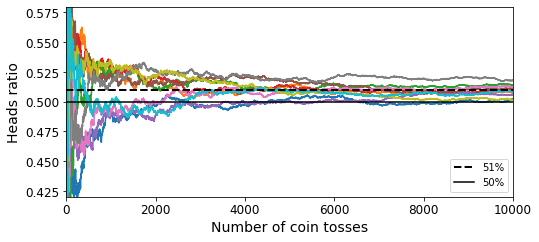

In [14]:
plt.figure(figsize = (8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000], [0.51,0.51], "k--",linewidth = 2, label = "51%")
plt.plot([0,10000], [0.5,0.5], "k-", label = "50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc = "lower right")
plt.axis([0,10000, 0.42, 0.58])
plt.show

## sample voiting classifier

#### should be undependent --> better different classifiers

In [4]:
#create dataset

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### hard = majority vote

In [45]:
# create classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver = "lbfgs", random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm_clf = SVC(gamma = "scale", random_state = 42)

voting_clf = VotingClassifier(
      estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
    , voting = 'hard') 

In [22]:
#fit to data

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [24]:
# check the accuracy

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### soft voting = average the prediction amoung all

#### all should have predict_proba()

In [32]:
log_clf = LogisticRegression(solver="lbfgs", random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm_clf = SVC(gamma = "scale", probability = True, random_state = 42) # change parameters for have predict_proba()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)]
    ,voting = 'soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [34]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_predict))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


# Bagging
## bootstrap aggregating


#### same algoriyhm, but different subset trsining set => more frequent(classification) / average (regression)
#### subsets with replacement


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42), n_estimators = 500
    ,max_samples = 100
    ,bootstrap = True
    ,random_state = 42)
# by default, soft voiting (if classifier has predict_prob() = decisionTree has)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [3]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

NameError: name 'y_test' is not defined

In [38]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


# Pasting (Bagging without replacement)

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42), n_estimators = 500
    ,max_samples = 100
    ,bootstrap = False # this is the difference
    ,random_state = 42)

### out-of-bag => 37% of inxtances never seen in each classifier

In [39]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500,
    bootstrap=True, 
    n_jobs=-1, # shows the core to use, -1 = whatever available
    oob_score=True) # automatic oob evaluation after training

bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.8933333333333333

In [40]:
# compare to test

from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.904

In [41]:
# oob estimation for each predictor (tree)
bag_clf.oob_decision_function_


array([[0.39378238, 0.60621762],
       [0.35025381, 0.64974619],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08457711, 0.91542289],
       [0.32222222, 0.67777778],
       [0.0201005 , 0.9798995 ],
       [0.9893617 , 0.0106383 ],
       [0.95121951, 0.04878049],
       [0.81443299, 0.18556701],
       [0.        , 1.        ],
       [0.78142077, 0.21857923],
       [0.83815029, 0.16184971],
       [0.98285714, 0.01714286],
       [0.05154639, 0.94845361],
       [0.        , 1.        ],
       [0.96132597, 0.03867403],
       [0.94303797, 0.05696203],
       [0.99453552, 0.00546448],
       [0.02469136, 0.97530864],
       [0.40883978, 0.59116022],
       [0.94      , 0.06      ],
       [1.        , 0.        ],
       [0.95833333, 0.04166667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64736842, 0.35263158],
       [0.

# Random Patches method
### Sampling traning instances + features

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42), n_estimators = 500
    
    ,max_samples = 100
    ,bootstrap = True # or false

    ,max_features = 0.9
    ,bootstrap_features = True

    ,random_state = 42
)

# Random Subspace method
### keep all instances and feature without replace

In [6]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42), n_estimators = 500
    
    ,max_samples = 100
    ,bootstrap = True # or false

    ,max_features = 0.9 # smaller than 1
    ,bootstrap_features = True

    ,random_state = 42
)

# Random Forest

#### classifier and regressor

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators = 500
    ,max_leaf_nodes = 16
    ,n_jobs = -1)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [12]:
# sample bagging with decision tree

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = "random", max_leaf_nodes = 16)
    ,n_estimators = 500
    ,max_samples = 1
    ,bootstrap = True
    ,n_jobs = -1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [16]:
np.sum(y_pred == y_pred_rf) / len(y_pred) # how much they are different

0.528

In [26]:
# regressor 

from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(
    n_estimators = 500
    ,max_leaf_nodes = 16
    ,n_jobs = -1)

rnd_reg.fit(X_train, y_train)

y_pred_rfr = rnd_reg.predict(X_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

In [27]:
print(y_pred_rfr[:10,:])

[[0.55491008 0.44508992]
 [0.75761728 0.24238272]
 [0.68465866 0.31534134]
 [0.01966088 0.98033912]
 [0.05401941 0.94598059]
 [0.146054   0.853946  ]
 [0.97264693 0.02735307]
 [0.97010692 0.02989308]
 [0.85411642 0.14588358]
 [0.96288096 0.03711904]]


# Extra Tree

### random forest with more randomization -- which is best? notice in practice
#### random threshold for each feature instead of searching for best possible feature

In [24]:
# from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(
    # some parameters
    n_estimators = 500
    ,max_leaf_nodes = 16
    ,n_jobs = -1)

#et_clf.fit(X_train, y_train)

#y_pred_rf = rnd_clf.predict(X_test)

### feature importance
#### how much the tree nodes that use that feature reduce impurity on average(across all trees in the forest)  

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators = 500, random_state = 42)

rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [29]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [32]:
# feature importance on mnist

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

mnist.target = mnist.target.astype(np.int8)

rnd_clf = RandomForestClassifier(n_estimators = 100 , random_state = 42)

rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [37]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = mpl.cm.hot, interpolation = "nearest")
    plt.axis("off")

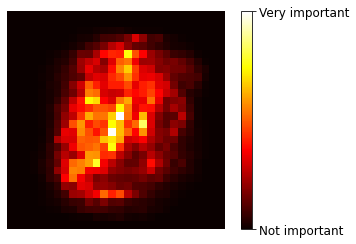

In [38]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# AdaBoost
#### train predicators sequencially, every one learns previous weakness better by weighting wrong instances more

In [40]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1)
    ,n_estimators = 200
    ,algorithm = "SAMME.R"
    ,learning_rate = 0.5
    ,random_state = 42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [42]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

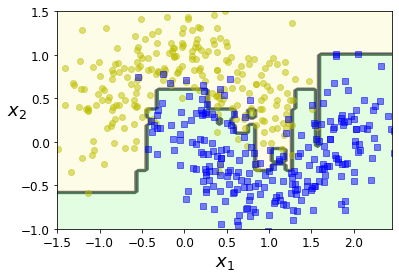

In [43]:
plot_decision_boundary(ada_clf,X,y)

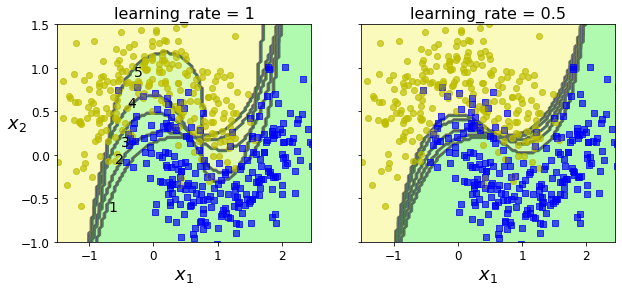

In [46]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

In [47]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_',
 'n_features_in_']

# Gradient Boosting

#### gradually add predicators, each one learns the previous error (gradually it is all predicators error)

In [48]:
# manually 

# create noisy dataset
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [49]:
from sklearn.tree import DecisionTreeRegressor

# first
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

# second
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

# third
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [50]:
X_new = np.array([[0.8]])

In [51]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [52]:
y_pred

array([0.75026781])

In [53]:
# by library

from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

### regularization --> shrinkage

In [54]:
# learning_rate : scale the tree 's contribution => less lr -> more tree
# good for regularization

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42) 
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

### early stopping


In [56]:
# staged_predi

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)

gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
    for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)

gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=68)

In [57]:
# stop training early and look back again
# warm_start=True : keep existing trees 

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")

error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [58]:
print(gbrt.n_estimators)

73


In [59]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.004746153473079122


# XGBoost
#### a library

In [60]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Error: the xgboost library is not installed.


In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) # Not shown
    print("Validation MSE:", val_error)    

In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  # Not shown
    print("Validation MSE:", val_error)            # Not shown

In [ ]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

In [ ]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

# stacking
#### split training set in two, use one to train predicators, use (second + layer1 predictions) as new for next predictor layer